# Analytical Derivation and Comparison of Alarm Similarity Analysis Methods Paper Code
Case Study: Gaussian Distribution

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from random import choice
from math import sqrt
from math import exp
from math import pi
from scipy.stats import norm 
import seaborn as sns

In [2]:
%run F_2d.ipynb import *

In [3]:
dim=15

In [4]:
Ro = np.load('sample_ro.npy') # load sample_ro.npy or you can call gen_cov(dim) from Generate_Covariance_Matrix.ipynb and get a random ro matrix, or use this ipynb file individually and create a .npy file and load it here.

In [5]:
# decalre sigmas and thresholds of the correlated processes (dim = 15 so len of lists should be 15).
sigma = np.matrix([3,4,5,3,5,3,4,5,6,5,4,5,3,2,5])
Ro_converter = np.squeeze(np.asarray(np.transpose(sigma)*sigma))

mean = [19,20,25,26,27,28,29,30,31,32,33,34,35,36,37]
threshold=[22,23,27,28,30,31,32,33,35,35,36,37,38,39,40]
thresholdHH=[23,24,28,29,31,32,33,34,35,36,37,38,39,40,41]
thresholdHI=[21,22,26,27,29,30,31,32,33,34,35,36,37,38,39]
thresholdLO=[17,18,23,24,25,26,27,28,29,30,31,32,33,34,35]
thresholdLL=[16,17,22,23,24,25,26,27,28,29,30,31,32,33,34]
                   
sigma=sigma.tolist()[0]
covar=np.multiply(Ro,Ro_converter)

# Analyic Section

### Ro (Correlation color map of the original processes)

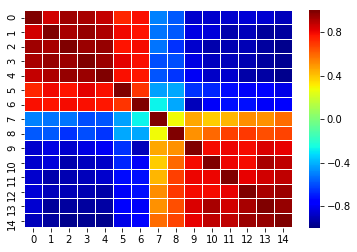

In [6]:
ax = sns.heatmap(Ro, vmin=-1, vmax=1 ,linewidth=0.01, center=0, cmap='jet')
plt.show()

### Binary Pearson

In [7]:
pearson=np.zeros([dim, dim], dtype=float)
for i in range(0,dim):
    for j in range(0,dim):
        if(i!=j):
            pearson[i][j]=(Qhh((threshold[i]-mean[i])/sigma[i],(threshold[j]-mean[j])/sigma[j],Ro[i][j])-((1-norm.cdf(threshold[i],mean[i],sigma[i]))*(1-norm.cdf(threshold[j],mean[j],sigma[j]))))/sqrt((1-norm.cdf(threshold[i],mean[i],sigma[i]))*(norm.cdf(threshold[i],mean[i],sigma[i]))*(1-norm.cdf(threshold[j],mean[j],sigma[j]))*(norm.cdf(threshold[j],mean[j],sigma[j])))
        else:
            pearson[i][j]=1

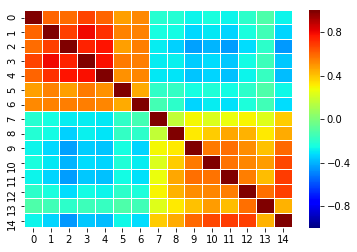

In [8]:
ax = sns.heatmap(pearson, vmin=-1, vmax=1, linewidth=0.01, center=0, cmap='jet')
plt.show()

### Multivalued Pearson

In [9]:
mu = np.zeros([1, dim], dtype=float)
si = np.zeros([1, dim], dtype=float)
E = np.zeros([dim, dim], dtype=float)
multipearson = np.zeros([dim, dim], dtype=float)

for i in range(0,dim):
    mu[0][i]=(2*(1-norm.cdf(thresholdHH[i],mean[i],sigma[i]))+((norm.cdf(thresholdHH[i],mean[i],sigma[i]))-(norm.cdf(thresholdHI[i],mean[i],sigma[i])))+((norm.cdf(thresholdLO[i],mean[i],sigma[i]))-(norm.cdf(thresholdLL[i],mean[i],sigma[i])))-2*(norm.cdf(thresholdLL[i],mean[i],sigma[i])))
    si[0][i]=(4*(1-norm.cdf(thresholdHH[i],mean[i],sigma[i]))+((norm.cdf(thresholdHH[i],mean[i],sigma[i])-norm.cdf(thresholdHI[i],mean[i],sigma[i])))+((norm.cdf(thresholdLO[i],mean[i],sigma[i]))-(norm.cdf(thresholdLL[i],mean[i],sigma[i])))+4*(norm.cdf(thresholdLL[i],mean[i],sigma[i])))-(mu[0][i]**2)


for i in range(0,dim):
    for j in range(0,dim):
        if(i!=j):
            E[i][j]=+4*Qhh((thresholdHH[i]-mean[i])/sigma[i],(thresholdHH[j]-mean[j])/sigma[j],Ro[i][j])+2*Qabh((thresholdHI[j]-mean[j])/sigma[j],(thresholdHH[j]-mean[j])/sigma[j],(thresholdHH[i]-mean[i])/sigma[i],Ro[i][j])-2*Qabh((thresholdLL[j]-mean[j])/sigma[j],(thresholdLO[j]-mean[j])/sigma[j],(thresholdHH[i]-mean[i])/sigma[i],Ro[i][j])-4*Qhl((thresholdHH[i]-mean[i])/sigma[i],(thresholdLL[j]-mean[j])/sigma[j],Ro[i][j])+2*Qabh((thresholdHI[i]-mean[i])/sigma[i],(thresholdHH[i]-mean[i])/sigma[i],(thresholdHH[j]-mean[j])/sigma[j],Ro[i][j])+Qabab((thresholdHI[i]-mean[i])/sigma[i],(thresholdHH[i]-mean[i])/sigma[i],(thresholdHI[j]-mean[j])/sigma[j],(thresholdHH[j]-mean[j])/sigma[j],Ro[i][j])-Qabab((thresholdHI[i]-mean[i])/sigma[i],(thresholdHH[i]-mean[i])/sigma[i],(thresholdLL[j]-mean[j])/sigma[j],(thresholdLO[j]-mean[j])/sigma[j],Ro[i][j])-2*Qabl((thresholdHI[i]-mean[i])/sigma[i],(thresholdHH[i]-mean[i])/sigma[i],(thresholdLL[j]-mean[j])/sigma[j],Ro[i][j])-2*Qabh((thresholdLL[i]-mean[i])/sigma[i],(thresholdLO[i]-mean[i])/sigma[i],(thresholdHH[j]-mean[j])/sigma[j],Ro[i][j])-Qabab((thresholdLL[i]-mean[i])/sigma[i],(thresholdLO[i]-mean[i])/sigma[i],(thresholdHI[j]-mean[j])/sigma[j],(thresholdHH[j]-mean[j])/sigma[j],Ro[i][j])+Qabab((thresholdLL[i]-mean[i])/sigma[i],(thresholdLO[i]-mean[i])/sigma[i],(thresholdLL[j]-mean[j])/sigma[j],(thresholdLO[j]-mean[j])/sigma[j],Ro[i][j])+2*Qabl((thresholdLL[i]-mean[i])/sigma[i],(thresholdLO[i]-mean[i])/sigma[i],(thresholdLL[j]-mean[j])/sigma[j],Ro[i][j])-4*Qhl((thresholdHH[j]-mean[j])/sigma[j],(thresholdLL[i]-mean[i])/sigma[i],Ro[i][j])-2*Qabl((thresholdHI[j]-mean[j])/sigma[j],(thresholdHH[j]-mean[j])/sigma[j],(thresholdLL[i]-mean[i])/sigma[i],Ro[i][j])+2*Qabl((thresholdLL[j]-mean[j])/sigma[j],(thresholdLO[j]-mean[j])/sigma[j],(thresholdLL[i]-mean[i])/sigma[i],Ro[i][j])+4*Qll((thresholdLL[i]-mean[i])/sigma[i],(thresholdLL[j]-mean[j])/sigma[j],Ro[i][j])
            multipearson[i][j]=(E[i][j]-(mu[0][i]*mu[0][j]))/sqrt(si[0][i]*si[0][j])
        else:
            multipearson[i][j]=1

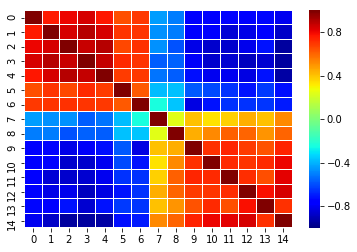

In [10]:
ax = sns.heatmap(multipearson, vmin=-1, vmax=1, linewidth=0.01, center=0, cmap='jet')
plt.show()

### Jaccard

In [11]:
jaccard=np.zeros([dim, dim], dtype=float)

for i in range(0,dim):
    for j in range(0,dim):
        if(i!=j):
            jaccard[i][j]=Qhh((threshold[i]-mean[i])/sigma[i],(threshold[j]-mean[j])/sigma[j],Ro[i][j])/(1-Qll((threshold[i]-mean[i])/sigma[i],(threshold[j]-mean[j])/sigma[j],Ro[i][j]))
        else:
            jaccard[i][j]=1

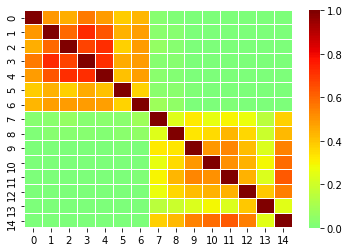

In [12]:
ax = sns.heatmap(jaccard, vmin=0, vmax=1, linewidth=0.01, center=0, cmap='jet')
plt.show()

# Simulation Section

### Ro (Correlation color map of the generated processes)

In [13]:
# generate simulation data 
data = np.random.multivariate_normal(mean , covar, 1000)

Ro2=np.zeros([dim, dim], dtype=float)
for i in range(0,dim):
    for j in range(0,dim):
        Ro2[i][j]=np.corrcoef(data[:,i], data[:,j])[0, 1]


# applying binary thresholds
data2 = np.zeros([1000, dim], dtype=float)
for i in range(0,dim):
    data2[:,i] = [1 if x >threshold[i] else 0 for x in data[:,i]]

    
# applying multivalued thresholds 
data3 = np.zeros([1000, dim], dtype=float)
for i in range(0,dim):
    p=0
    for k in data[:,i]:
        if(thresholdHH[i]<=k):
            data3[p][i]=2
        
        elif(k<=thresholdLL[i]):
            data3[p][i]=-2
        
        elif(thresholdHI[i]<=k<thresholdHH[i]):
            data3[p][i]=1
        
        elif(thresholdLL[i]<k<=thresholdLO[i]):
            data3[p][i]=-1
        
        else:
            data3[p][i]=0
            
        p=p+1

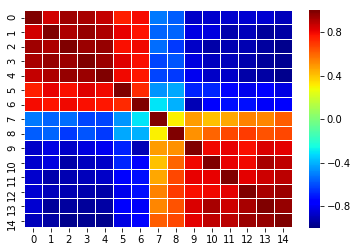

In [14]:
ax = sns.heatmap(Ro2, vmin=-1, vmax=1, linewidth=0.01, center=0, cmap='jet')
plt.show()

### Binary Pearson

In [15]:
pearson2=np.zeros([dim, dim], dtype=float)
for i in range(0,dim):
    for j in range(0,dim):
        pearson2[i][j]=np.corrcoef(data2[:,i], data2[:,j])[0, 1]

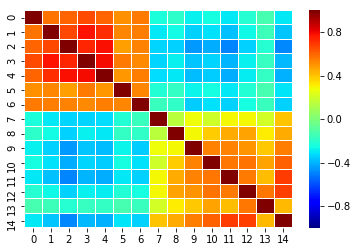

In [16]:
ax = sns.heatmap(pearson2, vmin=-1, vmax=1, linewidth=0.01, center=0, cmap='jet')
plt.show()

### Multivalued Pearson

In [17]:
si2=np.zeros([1, dim], dtype=float)            
multipearson2=np.zeros([dim, dim], dtype=float)
for i in range(0,dim):
    for j in range(0,dim):
        multipearson2[i][j]=np.corrcoef(data3[:,i], data3[:,j])[0, 1]
        si2[0][j]= np.var(data3[:,j])

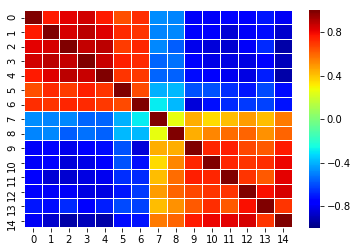

In [18]:
ax = sns.heatmap(multipearson2, vmin=-1, vmax=1, linewidth=0.01, center=0, cmap='jet')
plt.show()

### Jaccard

In [19]:
#definition
def jaccard_similarity(list1,list2,size):
    n11=0;n00=0
    for c1, c2 in zip(list1, list2):
        if((c1==1)&(c2==1)):
            n11=n11+1
        if((c1==0)&(c2==0)):
            n00=n00+1
    jac = n11 / (size-n00)
    return (jac)

k=0 #shift
jaccard2 = np.zeros([dim, dim], dtype=float)
for i in range(0,dim):
    for j in range(0,dim):
        jaccard2[i][j]=jaccard_similarity(data2[k:,i], data2[:1000-k,j],1000-k)    


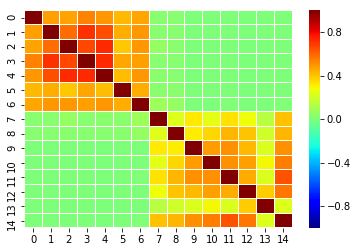

In [20]:
ax = sns.heatmap(jaccard2, vmin=-1, vmax=1, linewidth=0.01, center=0, cmap='jet')
plt.show()